<a href="https://colab.research.google.com/github/NguyenthanhTung14/Nguy-nThanhT-ng/blob/main/baitap_Flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array

In [17]:
folder = '/content/drive/MyDrive/FILE_ANH_AI/hinhLop/'
photos, labels = list(), list()
for file in listdir(folder):
  output= 0.0
  if file.startswith('BINH'):
    output= 1.0
  if file.startswith('chi'):
    output= 2.0
  if file.startswith('Chuong'):
    output= 3.0
  if file.startswith('Cuong'):
    output= 4.0
  if file.startswith('D_HUY'):
    output= 5.0
  if file.startswith('DONG'):
    output= 6.0
  if file.startswith('DUY'):
    output= 7.0 
  if file.startswith('NHuy'):
    output= 8.0 
  if file.startswith('Phong'):
    output= 9.0 
  if file.startswith('Thang'):
    output= 10.0 
  if file.startswith('Tri'):
    output= 11.0
  if file.startswith('Trong_Tri'):
    output= 12.0 
  if file.startswith('Tu'):
    output= 13.0
  if file.startswith('Tuan'):
    output= 14.0 
  if file.startswith('tung'):
    output= 15.0              
  photo = load_img(folder + file, target_size= (40,40))
  photo= img_to_array(photo)

  photos.append(photo)
  labels.append(output)

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/npy_Data/hinhlop_photos.npy', photos)
save('/content/drive/MyDrive/npy_Data/hinhlop_labels.npy', labels)

(1020, 40, 40, 3) (1020,)


In [20]:
# Split data into train & test
split_index = int(0.05 * len(photos))
test_x, test_y = photos[:split_index], labels[:split_index]
train_x, train_y = photos[split_index:], labels[split_index:]

In [21]:
print(test_x.shape, train_x.shape)

(51, 40, 40, 3) (969, 40, 40, 3)


In [22]:
train_x = train_x.reshape((969, 40, 40, 3)) #sửa lại cho giống như ma trận hàng trêntrên
train_x = train_x.astype('float32')/255

test_x = test_x.reshape((51, 40, 40, 3))
test_x = test_x.astype('float32')/255

In [24]:
from keras.utils import to_categorical
train_y = to_categorical(train_y,16) #bao nhiu output thì sửa lạilại
test_y = to_categorical(test_y,16)

In [30]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam
from keras import losses
loss = losses
batch_size = 64
epochs = 40
classes = 16 # bao nhiêu output thì sửa lại 

In [31]:
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape = (40, 40, 3), padding= 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(256, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(512, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(1024, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [32]:
#Đưa vào ANN, bộ ANN để phân loại:
from keras.losses import categorical_crossentropy
model.add(Flatten())
model.add(Dense(1024, activation = 'linear'))

model.add(Dense(classes, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 40, 40, 32)        896       
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 40, 40, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 20, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 20, 20, 64)        36928     
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                      

In [33]:
#Compile:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
train = model.fit(train_x, train_y, batch_size= batch_size, epochs= epochs, verbose= 1)


Epoch 1/40
16/16 [==============================] - 16s 51ms/step - loss: 2.6191 - accuracy: 0.1311
Epoch 2/40
16/16 [==============================] - 0s 17ms/step - loss: 1.2816 - accuracy: 0.5635
Epoch 3/40
16/16 [==============================] - 0s 17ms/step - loss: 0.3679 - accuracy: 0.8741
Epoch 4/40
16/16 [==============================] - 0s 17ms/step - loss: 0.1955 - accuracy: 0.9360
Epoch 5/40
16/16 [==============================] - 0s 17ms/step - loss: 0.0879 - accuracy: 0.9680
Epoch 6/40
16/16 [==============================] - 0s 17ms/step - loss: 0.0868 - accuracy: 0.9742
Epoch 7/40
16/16 [==============================] - 0s 17ms/step - loss: 0.0442 - accuracy: 0.9886
Epoch 8/40
16/16 [==============================] - 0s 17ms/step - loss: 0.0090 - accuracy: 0.9979
Epoch 9/40
16/16 [==============================] - 0s 17ms/step - loss: 0.0049 - accuracy: 0.9990
Epoch 10/40
16/16 [==============================] - 0s 17ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 11

In [34]:
# Evaluate model
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy:', test_acc)

2/2 [==============================] - 1s 220ms/step - loss: 3.2582e-06 - accuracy: 1.0000
Test accuracy: 1.0


In [35]:
model.save('/content/drive/MyDrive/Colab Notebooks/Data/flowers.h5')

1/1 [==============================] - 0s 19ms/step
Thanh


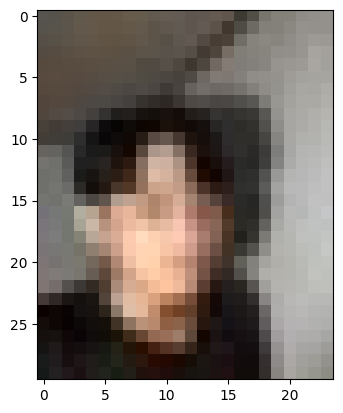

1/1 [==============================] - 0s 18ms/step
Tri


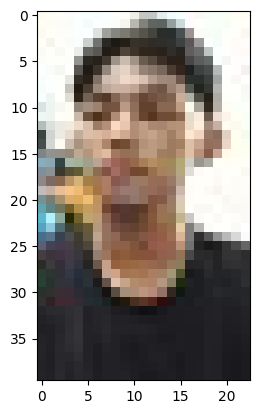

1/1 [==============================] - 0s 20ms/step
Tu


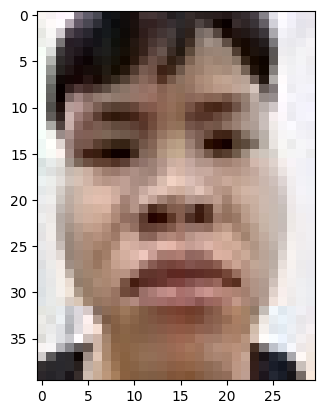

1/1 [==============================] - 0s 19ms/step
Trong_Tri


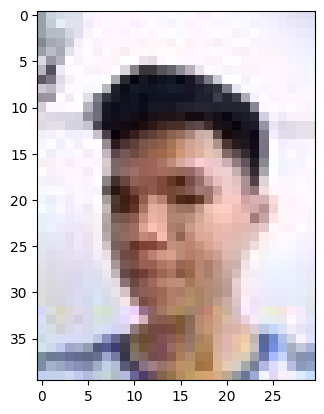

1/1 [==============================] - 0s 21ms/step



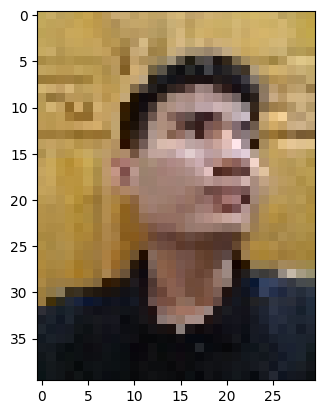

1/1 [==============================] - 0s 21ms/step
Thang


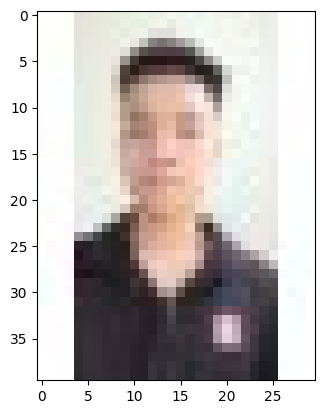

1/1 [==============================] - 0s 20ms/step
D_HUY


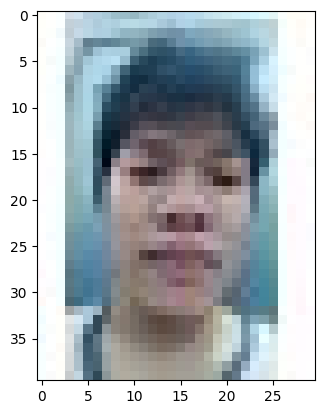

1/1 [==============================] - 0s 18ms/step
Chuong


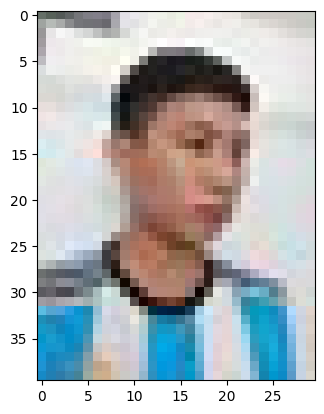

1/1 [==============================] - 0s 19ms/step
DUY


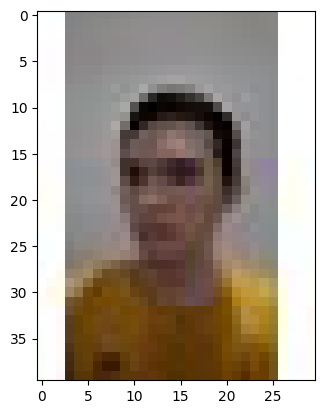

1/1 [==============================] - 0s 25ms/step
Phong


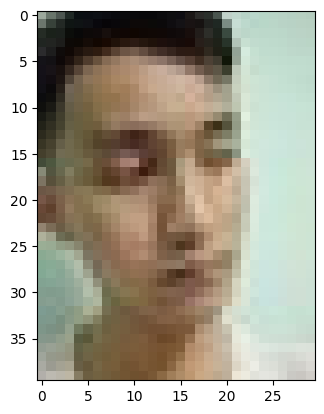

1/1 [==============================] - 0s 19ms/step
chi


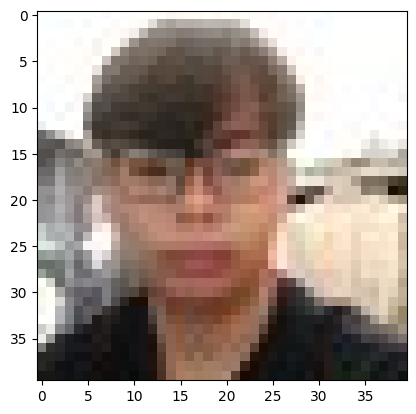

1/1 [==============================] - 0s 20ms/step
Cuong


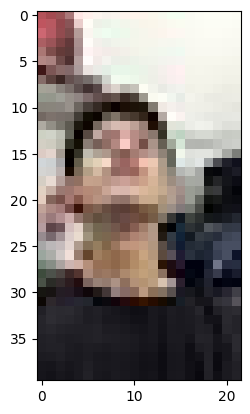

1/1 [==============================] - 0s 22ms/step
NHuy


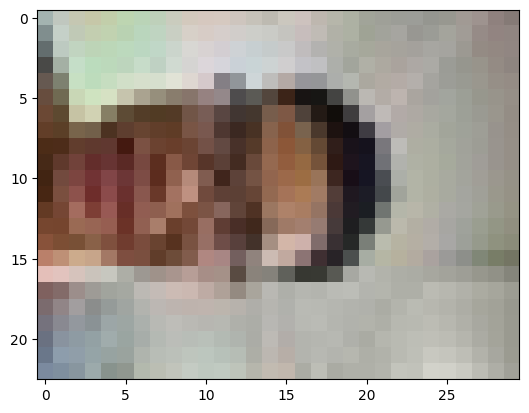

1/1 [==============================] - 0s 20ms/step
BINH


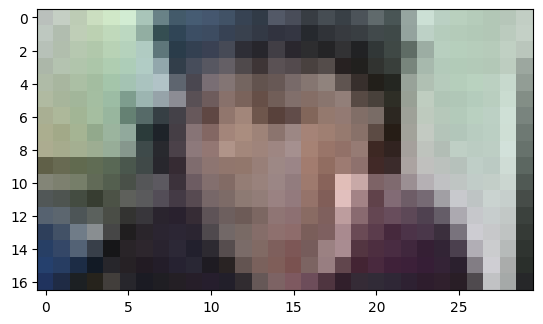

1/1 [==============================] - 0s 26ms/step
DONG


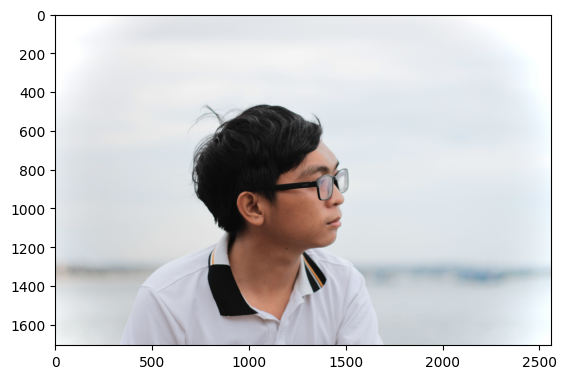

1/1 [==============================] - 0s 22ms/step
Chuong


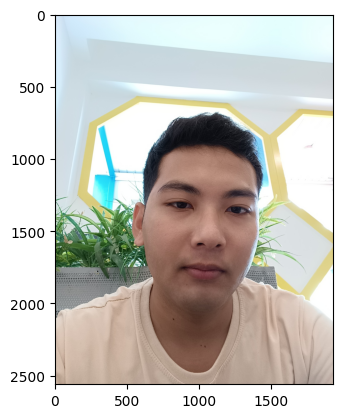

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
folder = '/content/drive/MyDrive/npy_Data/Test_hinhlop/'
for file in listdir(folder):
  photo = load_img(folder  +  file)
  plt.imshow(photo)
  
  photo = load_img(folder +   file, target_size = (40, 40))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  class_name=['','BINH', 'chi', 'Chuong', 'Cuong', 'D_HUY','DONG', 'DUY', 'NHuy','Phong','Thang','Thanh','Tri','Trong_Tri','Tu','Tuan','tung']
  print(class_name[result])
  plt.show()